# 数据读取及处理

为检验指标在A股市场的有效性，我们选择以A股市场所有股票为样本，交易数据时间区间选择2016年6月1日到2021年5月31日，相应的，所需财务数据从2014年至2019年年报中获得。本报告所用数据全部从国泰安数据库获得，将获取的数据经过一系列合并后可以得到交易数据和财务数据两张表。

In [2]:
import pandas as pd
trd_dat =  pd.read_csv('交易数据.csv')
fin_dat = pd.read_csv('财务数据.csv')
ind_dat = pd.read_csv('股票行业.csv')
fin_dat = pd.merge(fin_dat, ind_dat, on='Stkcd', how='left')
trd_dat = pd.merge(trd_dat, ind_dat, on='Stkcd', how='left')

In [3]:
def mnt_ret_proc(df, begdate= , enddate= , ):  # 处理交易数据
    df = df.query('Indcd!=1')  # 去除金融行业
    df.sort_values(by=["Stkcd","Trdmnt"], ascending=True, inplace = True)
    df['mv'] = df['Msmvosd']
    def f(x):
        x['ref_mv']=x['mv'].shift(1)
        return x
    df = df.groupby('Stkcd').apply(f)  # 计算参考市值
    return df
trd_dat = mnt_ret_proc(trd_dat)
trd_dat

e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stkcd,Trdmnt,Msmvosd,Mretwd,Stknme,Indcd,Listdt,mv,ref_mv
61,2,2016-07,1.663970e+08,-0.268932,万科A,3,1991-01-29,1.663970e+08,NaN
62,2,2016-08,2.420231e+08,0.454492,万科A,3,1991-01-29,2.420231e+08,1.663970e+08
63,2,2016-09,2.540612e+08,0.049739,万科A,3,1991-01-29,2.540612e+08,2.420231e+08
64,2,2016-10,2.419260e+08,-0.047765,万科A,3,1991-01-29,2.419260e+08,2.540612e+08
65,2,2016-11,2.619247e+08,0.082665,万科A,3,1991-01-29,2.619247e+08,2.419260e+08
...,...,...,...,...,...,...,...,...,...
212522,689009,2021-01,5.782560e+05,0.168492,九号公司,5,2020-10-29,5.782560e+05,4.948737e+05
212523,689009,2021-02,4.042256e+05,-0.300957,九号公司,5,2020-10-29,4.042256e+05,5.782560e+05
212524,689009,2021-03,3.838125e+05,-0.050499,九号公司,5,2020-10-29,3.838125e+05,4.042256e+05
212525,689009,2021-04,6.438699e+05,0.117788,九号公司,5,2020-10-29,6.438699e+05,3.838125e+05


In [4]:
def fin_dat_proc(df):
    new_df = df.query('Indcd!=1')  # 去除金融行业
    new_df.sort_values(by=['Stkcd', 'Accper'], ascending=True, inplace = True)
    new_df.dropna(inplace=True)  # 去除财务指标有缺失的行，因每个指标都是必须的
    return new_df
fin_dat = fin_dat_proc(fin_dat)
fin_dat

e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Stkcd,Accper,B001101000,B001201000,B002000000,C001000000,A001100000,A001000000,A002100000,A002206000,A002000000,Y0601b,Newiss,Stknme,Indcd,Listdt
6,2,2014-12-31,1.463880e+11,1.025570e+11,1.928752e+10,4.172482e+10,4.648060e+11,5.084090e+11,3.456540e+11,4.614894e+10,3.925150e+11,40647.0,0,万科A,3,1991-01-29
7,2,2015-12-31,1.955490e+11,1.381510e+11,2.594944e+10,1.604602e+10,5.470240e+11,6.112960e+11,4.200620e+11,5.284440e+10,4.749860e+11,42295.0,0,万科A,3,1991-01-29
8,2,2016-12-31,2.404770e+11,1.697420e+11,2.835026e+10,3.956613e+10,7.212950e+11,8.306740e+11,5.799980e+11,8.551444e+10,6.689980e+11,58280.0,0,万科A,3,1991-01-29
9,2,2017-12-31,2.428970e+11,1.600800e+11,3.720839e+10,8.232283e+10,1.017550e+12,1.165350e+12,8.473550e+11,1.283520e+11,9.786730e+11,77708.0,0,万科A,3,1991-01-29
10,2,2018-12-31,2.976790e+11,1.861040e+11,4.927229e+10,3.361818e+10,1.295070e+12,1.528580e+12,1.121910e+12,1.680240e+11,1.292960e+12,104300.0,0,万科A,3,1991-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19453,688357,2019-12-31,4.059720e+08,2.480996e+08,8.600338e+07,4.160475e+07,7.789224e+08,1.157027e+09,2.390369e+08,3.600000e+07,2.856344e+08,469.0,0,建龙微纳,5,2019-12-04
19454,688358,2019-12-31,3.697557e+08,1.445190e+08,1.051324e+08,7.982711e+07,1.235094e+09,1.290504e+09,8.988929e+07,1.601195e+07,1.197061e+08,606.0,0,祥生医疗,5,2019-12-03
19456,688366,2019-12-31,1.604334e+09,3.639993e+08,3.763766e+08,3.489109e+08,3.945375e+09,6.151869e+09,3.599657e+08,6.526787e+05,4.985169e+08,1338.0,0,昊海生科,5,2019-10-30
19461,688396,2019-12-31,5.742784e+09,4.431295e+09,5.124265e+08,5.762586e+08,5.092496e+09,1.009529e+10,1.978723e+09,1.556113e+09,3.704466e+09,7878.0,0,华润微,5,2020-02-27


# 计算lfe和f-score

In [5]:
## 计算lfe
def calc_lfe(df):  # 组内计算lfe
    tmp = df['B001101000'] / df['Y0601b']
    df['lfe'] = tmp.diff() / tmp.shift(1)
    return df
fin_dat = fin_dat.groupby('Stkcd').apply(calc_lfe)  # 按股票代码分组计算lfe

In [6]:
fin_dat

,Stkcd,Accper,B001101000,B001201000,B002000000,C001000000,A001100000,A001000000,A002100000,A002206000,A002000000,Y0601b,Newiss,Stknme,Indcd,Listdt,lfe
6,2,2014-12-31,1.463880e+11,1.025570e+11,1.928752e+10,4.172482e+10,4.648060e+11,5.084090e+11,3.456540e+11,4.614894e+10,3.925150e+11,40647.0,0,万科A,3,1991-01-29,NaN
7,2,2015-12-31,1.955490e+11,1.381510e+11,2.594944e+10,1.604602e+10,5.470240e+11,6.112960e+11,4.200620e+11,5.284440e+10,4.749860e+11,42295.0,0,万科A,3,1991-01-29,0.283777
8,2,2016-12-31,2.404770e+11,1.697420e+11,2.835026e+10,3.956613e+10,7.212950e+11,8.306740e+11,5.799980e+11,8.551444e+10,6.689980e+11,58280.0,0,万科A,3,1991-01-29,-0.107543
9,2,2017-12-31,2.428970e+11,1.600800e+11,3.720839e+10,8.232283e+10,1.017550e+12,1.165350e+12,8.473550e+11,1.283520e+11,9.786730e+11,77708.0,0,万科A,3,1991-01-29,-0.242465
10,2,2018-12-31,2.976790e+11,1.861040e+11,4.927229e+10,3.361818e+10,1.295070e+12,1.528580e+12,1.121910e+12,1.680240e+11,1.292960e+12,104300.0,0,万科A,3,1991-01-29,-0.086923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19453,688357,2019-12-31,4.059720e+08,2.480996e+08,8.600338e+07,4.160475e+07,7.789224e+08,1.157027e+09,2.390369e+08,3.600000e+07,2.856344e+08,469.0,0,建龙微纳,5,2019-12-04,NaN
19454,688358,2019-12-31,3.697557e+08,1.445190e+08,1.051324e+08,7.982711e+07,1.235094e+09,1.290504e+09,8.988929e+07,1.601195e+07,1.197061e+08,606.0,0,祥生医疗,5,2019-12-03,NaN
19456,688366,2019-12-31,1.604334e+09,3.639993e+08,3.763766e+08,3.489109e+08,3.945375e+09,6.151869e+09,3.599657e+08,6.526787e+05,4.985169e+08,1338.0,0,昊海生科,5,2019-10-30,NaN
19461,688396,2019-12-31,5.742784e+09,4.431295e+09,5.124265e+08,5.762586e+08,5.092496e+09,1.009529e+10,1.978723e+09,1.556113e+09,3.704466e+09,7878.0,0,华润微,5,2020-02-27,NaN


In [7]:
## 计算f-score
def calc_f_score(df):  # 组内计算f-score

    ROA = fin_dat['B002000000'] / fin_dat['A001000000']  # 资产收益率
    CFO = fin_dat['C001000000'] / fin_dat['A001000000'] # 经营现金流比总资产
    LEVER = fin_dat['A002206000'] / fin_dat['A001000000'] # 长期负债比总资产
    LIQUID = fin_dat['A001100000'] / fin_dat['A002100000'] # 流动资产比流动负债
    MARGIN = (fin_dat['B001101000'] - fin_dat['B001201000']) / fin_dat['B002000000']  # 毛利率
    TURN = fin_dat['B001101000'] / fin_dat['A001000000']  # 资产周转率
    
    dROA = ROA.diff()
    dLEVER = LEVER.diff()
    dLIQUID = LIQUID.diff()
    dMARGIN = MARGIN.diff()
    dTURN = TURN.diff()
    
    ## 计算fundamental signals
    df['f_ROA'] = (ROA > 0).astype(int)
    df['f_CFO'] = (CFO > 0).astype(int)
    df['f_dROA'] = (dROA > 0).astype(int)
    df['f_ACC'] = (CFO > ROA).astype(int)
    df['f_dLEVER'] = (dLEVER < 0).astype(int)
    df['f_dLIQUID'] = (dLIQUID > 0).astype(int)
    df['f_dMARGIN'] = (dMARGIN > 0).astype(int)
    df['f_dTURN'] = (dTURN > 0).astype(int)
    df['f_EQ'] = df['Newiss'].shift(1)  # 前一年是否增发新股
    
    ## f-score
    df['f-score'] = (df['f_ROA'] + df['f_CFO'] + df['f_dROA'] + df['f_ACC']
                    + df['f_dLEVER'] + df['f_dLIQUID'] + df['f_EQ']
                    + df['f_dMARGIN'] + df['f_dTURN'])
    
    return df

fin_dat = fin_dat.groupby('Stkcd').apply(calc_f_score)  # 分组计算f-score
keep = ['Stkcd', 'Accper', 'Indcd', 'lfe', 'f-score']
fin_dat = fin_dat[keep]  # 去除无用列，节省内存

In [8]:
fin_dat['lfe'].describe()

count    11934.000000
mean         0.267420
std          4.721933
min         -1.599098
25%         -0.070453
50%          0.065054
75%          0.218039
max        445.064415
Name: lfe, dtype: float64

In [9]:
import numpy as np

def winsorize(df, var, perc):
    new_df = df[df[var].notnull()]
    perc1 = perc
    perc2 = 100 - perc
    p1, p2 = np.percentile(new_df[var], perc1), np.percentile(new_df[var], perc2)
    def f(x):
        if x < p1:
            x = p1
        elif x > p2:
            x = p2
        return x
    new_df[var] = new_df[var].map(f)
    return new_df
win_fin_dat = winsorize(fin_dat, 'lfe', 1)

e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# 指标分布

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## lfe分布

这里计算的是2019年lfe在A股所有上市公司中的分布

e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


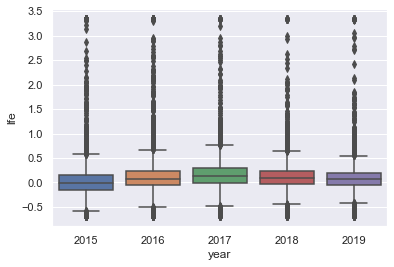

In [11]:
# lfe_df = win_fin_dat[pd.notnull(win_fin_dat['lfe'])]
win_fin_dat['year'] = win_fin_dat['Accper'].map(lambda x: x[:4])
sns.boxplot(x='year', y='lfe', data=win_fin_dat)
plt.show()

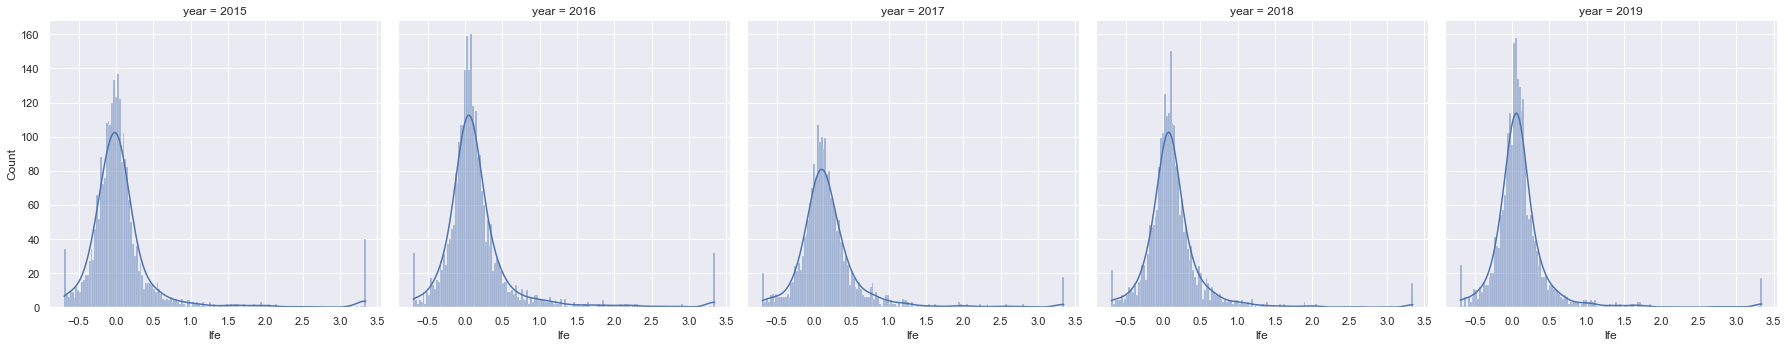

In [12]:
sns.displot(win_fin_dat, x='lfe', col='year', kde=True)
plt.show()

## f-score分布

In [13]:
# f_score_df = win_fin_dat[win_fin_dat['f-score'].notnull()]
win_fin_dat['f-score'].value_counts()

5.0    3014
4.0    2479
6.0    2455
3.0    1577
7.0    1277
2.0     636
8.0     270
1.0     180
9.0      23
0.0      23
Name: f-score, dtype: int64

e:\python3.7.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


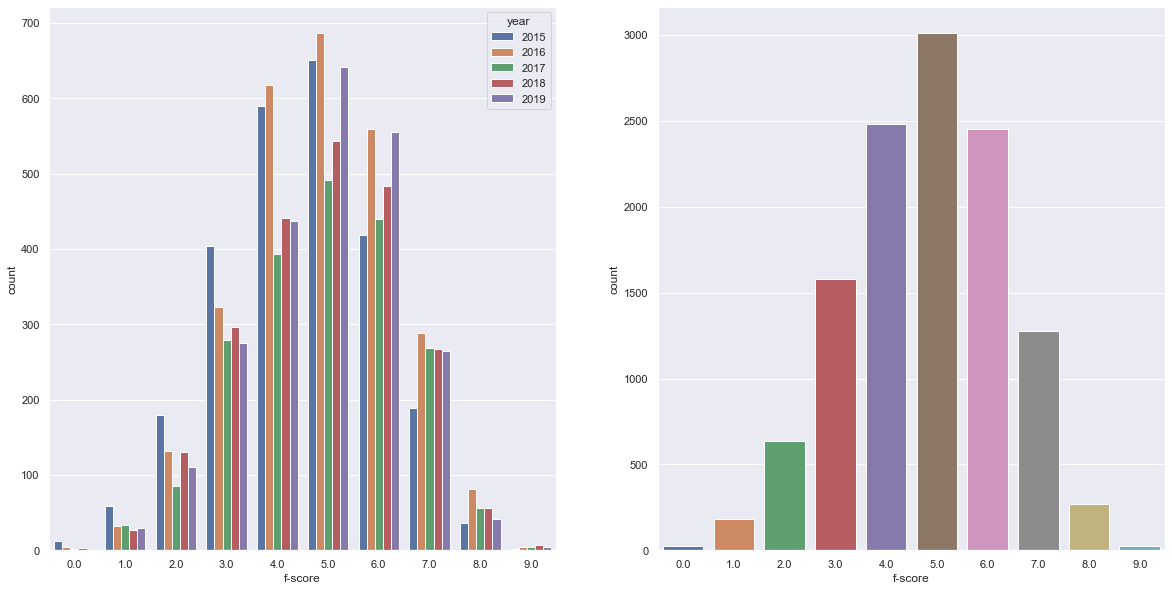

In [14]:
win_fin_dat['year'] = win_fin_dat['Accper'].map(lambda x: x[:4])
fig, axes = plt.subplots(1, 2, figsize=(20,10))
sns.countplot(x='f-score', hue='year', data=win_fin_dat, ax=axes[0])
sns.countplot(x='f-score', data=win_fin_dat, ax=axes[1])
plt.show()

# 计算因子收益率

## lfe指标

In [156]:
def split_group_10(df1, df2, var):  # 按lfe分组
    df1 = df1.copy()
    df2 = df2.copy()
    def f(x):
        x['group'] = pd.qcut(x[var], 10, labels=list('123456789')+['10'])
        return x
    grouped_df1 = df1.groupby('Accper').apply(f)  # 按会计年度划分deciles
    grouped_df1['merge_key'] = grouped_df1['Accper'].map(lambda x: x[:4])
    df2['year'] = df2['Trdmnt'].map(lambda x: x[:4])
    df2['month'] = df2['Trdmnt'].map(lambda x: x[-2:])
    def g(x, y):
        if y >= '06':
            return str(int(x)-1)
        else:
            return str(int(x)-2)
    df2['merge_key'] = list(map(g, df2['year'], df2['month']))  # 构造merge_key，用于与交易数据合并
#     print(grouped_df1.shape[0], df2.shape[0])
#     print(grouped_df1.reset_index()['merge_key'][0] == df2.reset_index()['merge_key'][0])
    df = pd.merge(grouped_df1, df2, on=['merge_key', 'Stkcd'])
    return df
lfe_group_df = split_group_10(win_fin_dat, trd_dat, 'lfe')
lfe_group_df

,Stkcd,Accper,Indcd_x,lfe,f-score,year_x,group,merge_key,Trdmnt,Msmvosd,Mretwd,Stknme,Indcd_y,Listdt,mv,ref_mv,year_y,month
0,2,2015-12-31,3,0.283777,5.0,2015,9,2015,2016-07,1.663970e+08,-0.268932,万科A,3,1991-01-29,1.663970e+08,NaN,2016,07
1,2,2015-12-31,3,0.283777,5.0,2015,9,2015,2016-08,2.420231e+08,0.454492,万科A,3,1991-01-29,2.420231e+08,1.663970e+08,2016,08
2,2,2015-12-31,3,0.283777,5.0,2015,9,2015,2016-09,2.540612e+08,0.049739,万科A,3,1991-01-29,2.540612e+08,2.420231e+08,2016,09
3,2,2015-12-31,3,0.283777,5.0,2015,9,2015,2016-10,2.419260e+08,-0.047765,万科A,3,1991-01-29,2.419260e+08,2.540612e+08,2016,10
4,2,2015-12-31,3,0.283777,5.0,2015,9,2015,2016-11,2.619247e+08,0.082665,万科A,3,1991-01-29,2.619247e+08,2.419260e+08,2016,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138888,603999,2016-12-31,2,-0.084762,5.0,2016,3,2016,2018-01,1.757952e+06,-0.007802,读者传媒,2,2015-12-10,1.757952e+06,1.771776e+06,2018,01
138889,603999,2016-12-31,2,-0.084762,5.0,2016,3,2016,2018-02,1.649664e+06,-0.061599,读者传媒,2,2015-12-10,1.649664e+06,1.757952e+06,2018,02
138890,603999,2016-12-31,2,-0.084762,5.0,2016,3,2016,2018-03,1.693440e+06,0.026536,读者传媒,2,2015-12-10,1.693440e+06,1.649664e+06,2018,03
138891,603999,2016-12-31,2,-0.084762,5.0,2016,3,2016,2018-04,1.640448e+06,-0.031293,读者传媒,2,2015-12-10,1.640448e+06,1.693440e+06,2018,04


In [157]:
lfe_group_df = lfe_group_df.sort_values(by=['group', 'Accper'], ascending=True)
lfe_group_ret = lfe_group_df.groupby(['group', 'Trdmnt']).mean()[['Mretwd']].reset_index()  # 
lfe_group_ret

,group,Trdmnt,Mretwd
0,1,2016-06,0.046615
1,1,2016-07,-0.016955
2,1,2016-08,0.059490
3,1,2016-09,0.011086
4,1,2016-10,0.038228
...,...,...,...
595,10,2021-01,-0.074317
596,10,2021-02,0.034586
597,10,2021-03,0.020385
598,10,2021-04,-0.008490


In [158]:
lfe_group_ret = lfe_group_ret.pivot('Trdmnt', 'group', 'Mretwd')  # 收益结果转置

In [159]:
mean_lfe_group_ret = pd.DataFrame({'Mretwd': lfe_group_ret.mean(axis=0)})
mean_lfe_group_ret

,Mretwd
group,
1,-0.003640
2,0.002264
3,0.004729
4,0.002018
5,0.003672
6,0.003612
7,0.002721
8,0.004111
9,0.000536


In [160]:
mean_lfe_group_ret.reset_index(inplace=True)
mean_lfe_group_ret['group'] = mean_lfe_group_ret['group'].astype(int)
mean_lfe_group_ret.corr(method='spearman')  # 计算组别与月平均收益的spearman秩相关系数

,group,Mretwd
group,1.000000,-0.030303
Mretwd,-0.030303,1.000000


In [165]:
index_ret = pd.read_csv('指数月回报率.csv')
lfe_group_ret.columns = list('123456789')+['10']
lfe_group_ret.reset_index(inplace=True)
lfe_group_ret['index'] = index_ret['Idxrtn']  # 加上指数回报率
lfe_group_ret['long_short'] = lfe_group_ret['10'] - lfe_group_ret['1']  # 加上多空组
lfe_group_ret

,Trdmnt,1,2,3,4,5,6,7,8,9,10,index,long_short
0,2016-06,0.046615,0.058912,0.065072,0.056170,0.052813,0.072755,0.061695,0.058084,0.063566,0.048799,0.005172,0.002184
1,2016-07,-0.016955,-0.006577,-0.003365,0.000267,-0.000008,0.000940,0.001978,-0.000099,-0.004710,-0.003722,0.014978,0.013233
2,2016-08,0.059490,0.049487,0.051760,0.046268,0.053875,0.042853,0.046763,0.051262,0.046217,0.057763,0.038246,-0.001727
3,2016-09,0.011086,0.001330,0.001116,-0.005890,-0.006695,-0.004127,-0.007774,-0.006639,-0.012003,-0.010552,-0.020606,-0.021639
4,2016-10,0.038228,0.043872,0.037382,0.036138,0.041626,0.036355,0.033704,0.041017,0.030104,0.022706,0.023716,-0.015522
5,2016-11,0.035142,0.032807,0.030641,0.035834,0.037957,0.021297,0.034355,0.019618,0.017184,0.020042,0.048397,-0.015100
6,2016-12,-0.031672,-0.038628,-0.033806,-0.027895,-0.036582,-0.053046,-0.041745,-0.045219,-0.053330,-0.046743,-0.059818,-0.015071
7,2017-01,-0.035170,-0.012234,-0.012368,-0.014477,-0.027745,-0.012769,-0.025393,-0.018135,-0.025164,-0.031682,0.014570,0.003488
8,2017-02,0.041753,0.052515,0.049456,0.034494,0.039200,0.040149,0.039820,0.032270,0.039987,0.033902,0.024241,-0.007851
9,2017-03,-0.036619,-0.025943,-0.013533,-0.019993,-0.020465,-0.020679,-0.019734,-0.020060,-0.014432,-0.016032,-0.001611,0.020587


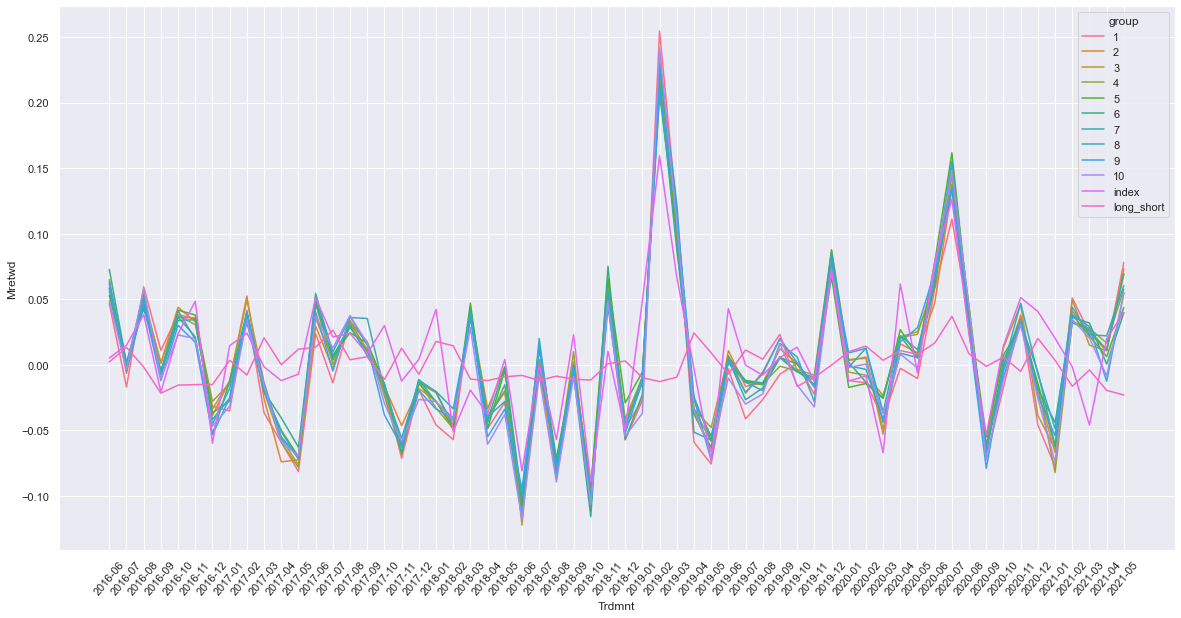

In [172]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='Trdmnt', y='Mretwd', hue='group', data=lfe_group_ret.melt(['Trdmnt'], var_name='group', value_name='Mretwd'))
plt.xticks(rotation=50)
plt.show()

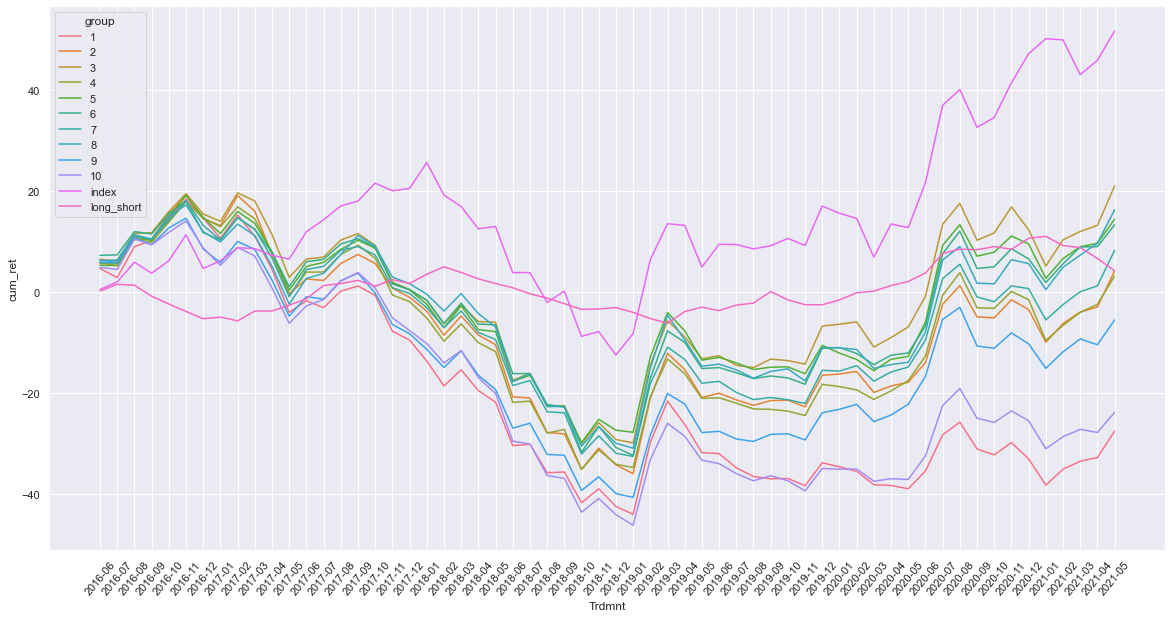

In [173]:
lfe_group_ret = lfe_group_ret.melt(['Trdmnt'], var_name='group', value_name='Mretwd')
def cum_ret(df):
    df['cum_ret'] = ((df['Mretwd'] + 1).cumprod() - 1)* 100
    return df
lfe_group_cum_ret = lfe_group_ret.groupby('group').apply(cum_ret)
plt.figure(figsize=(20, 10))
sns.lineplot(x='Trdmnt', y='cum_ret', hue='group', data=lfe_group_cum_ret)  # 分组累计收益时序图
plt.xticks(rotation=50)
plt.show()

# 分行业计算因子收益率